

<h1 align=left><font size = 5>Building a Concrete Compressive Strength Prediction Model</font></h1>


## Project Goals
The compressive strength of concrete determines the quality of concrete. This is generally ascertained by a standard crushing test on a concrete cylinder. This requires engineers to fabricate small concrete cylinders with various combinations of raw materials and test these cylinders for strength variations with a change in each raw material. The recommended wait time for testing the cylinder is 28 days to ensure correct results. This is very time consuming. In this project, I am going to analyse the Concrete Compressive Strength dataset and build Machine Learning models to predict the compressive strength. The following approach has been used:
1. Explore the key factors 
2. Build regression models  using the Keras library to predict the compressive strength
3. Train the model several times with different network properties such as the number of epochs and hidden layers, to increase the model accuracy

## Table of Contents

1. Build a baseline model 
2. Normalize the data
3. Increase the number of epochs
4. Increase the number of hidden layers


<a id="item31"></a>


## 1. Build a baseline model


Importing the <em>pandas</em> and the Numpy libraries.


In [1]:
# All Libraries required 
!pip install numpy==1.21.4
!pip install pandas==1.3.4
!pip install keras==2.1.6

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them:</strong>

1. Cement

2. Blast Furnace Slag

3. Fly Ash

4. Water

5. Superplasticizer

6. Coarse Aggregate

7. Fine Aggregate


Downloading the data and read it into a <em>pandas</em> dataframe.


In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Checking how many data points we have.


In [4]:
concrete_data.shape

(1030, 9)

So, there are 1030 samples to train our model on. 

In [5]:
print("Dataframe length:", len(concrete_data))

Dataframe length: 1030


In [6]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Exploratory Data Analysis (EDA)

In [7]:
concrete_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

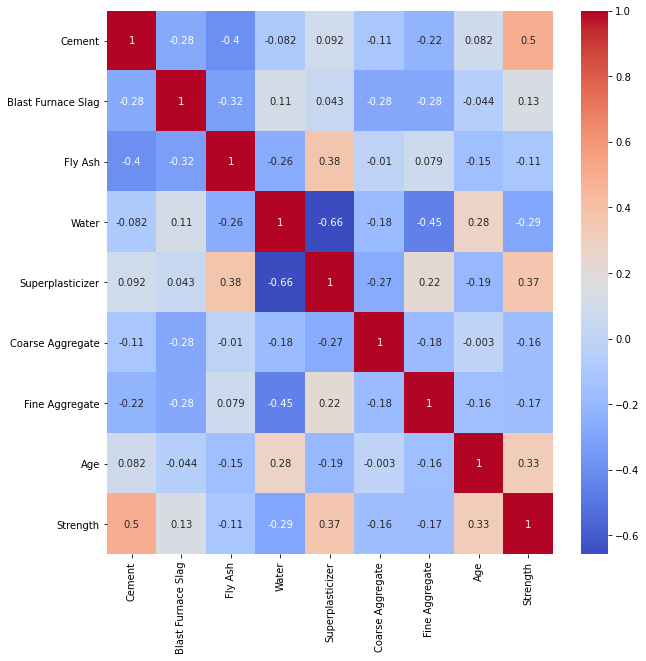

In [8]:
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(concrete_data.corr(), 
        xticklabels=concrete_data.corr().columns,
        yticklabels=concrete_data.corr().columns, cmap= 'coolwarm', annot = True)

We can observe a high positive correlation between compressive strength and cement. This is true because strength of concrete indeed increases with an increase in the amount of cement used in preparing it. Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.
There are other strong correlations between the following features:
1. A strong negative correlation between Super Plasticizer and Water
2. Positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate


### Pairplot 
Plotting pairwise relations (also called pairplot) between all the features and distributions of features along the diagonal

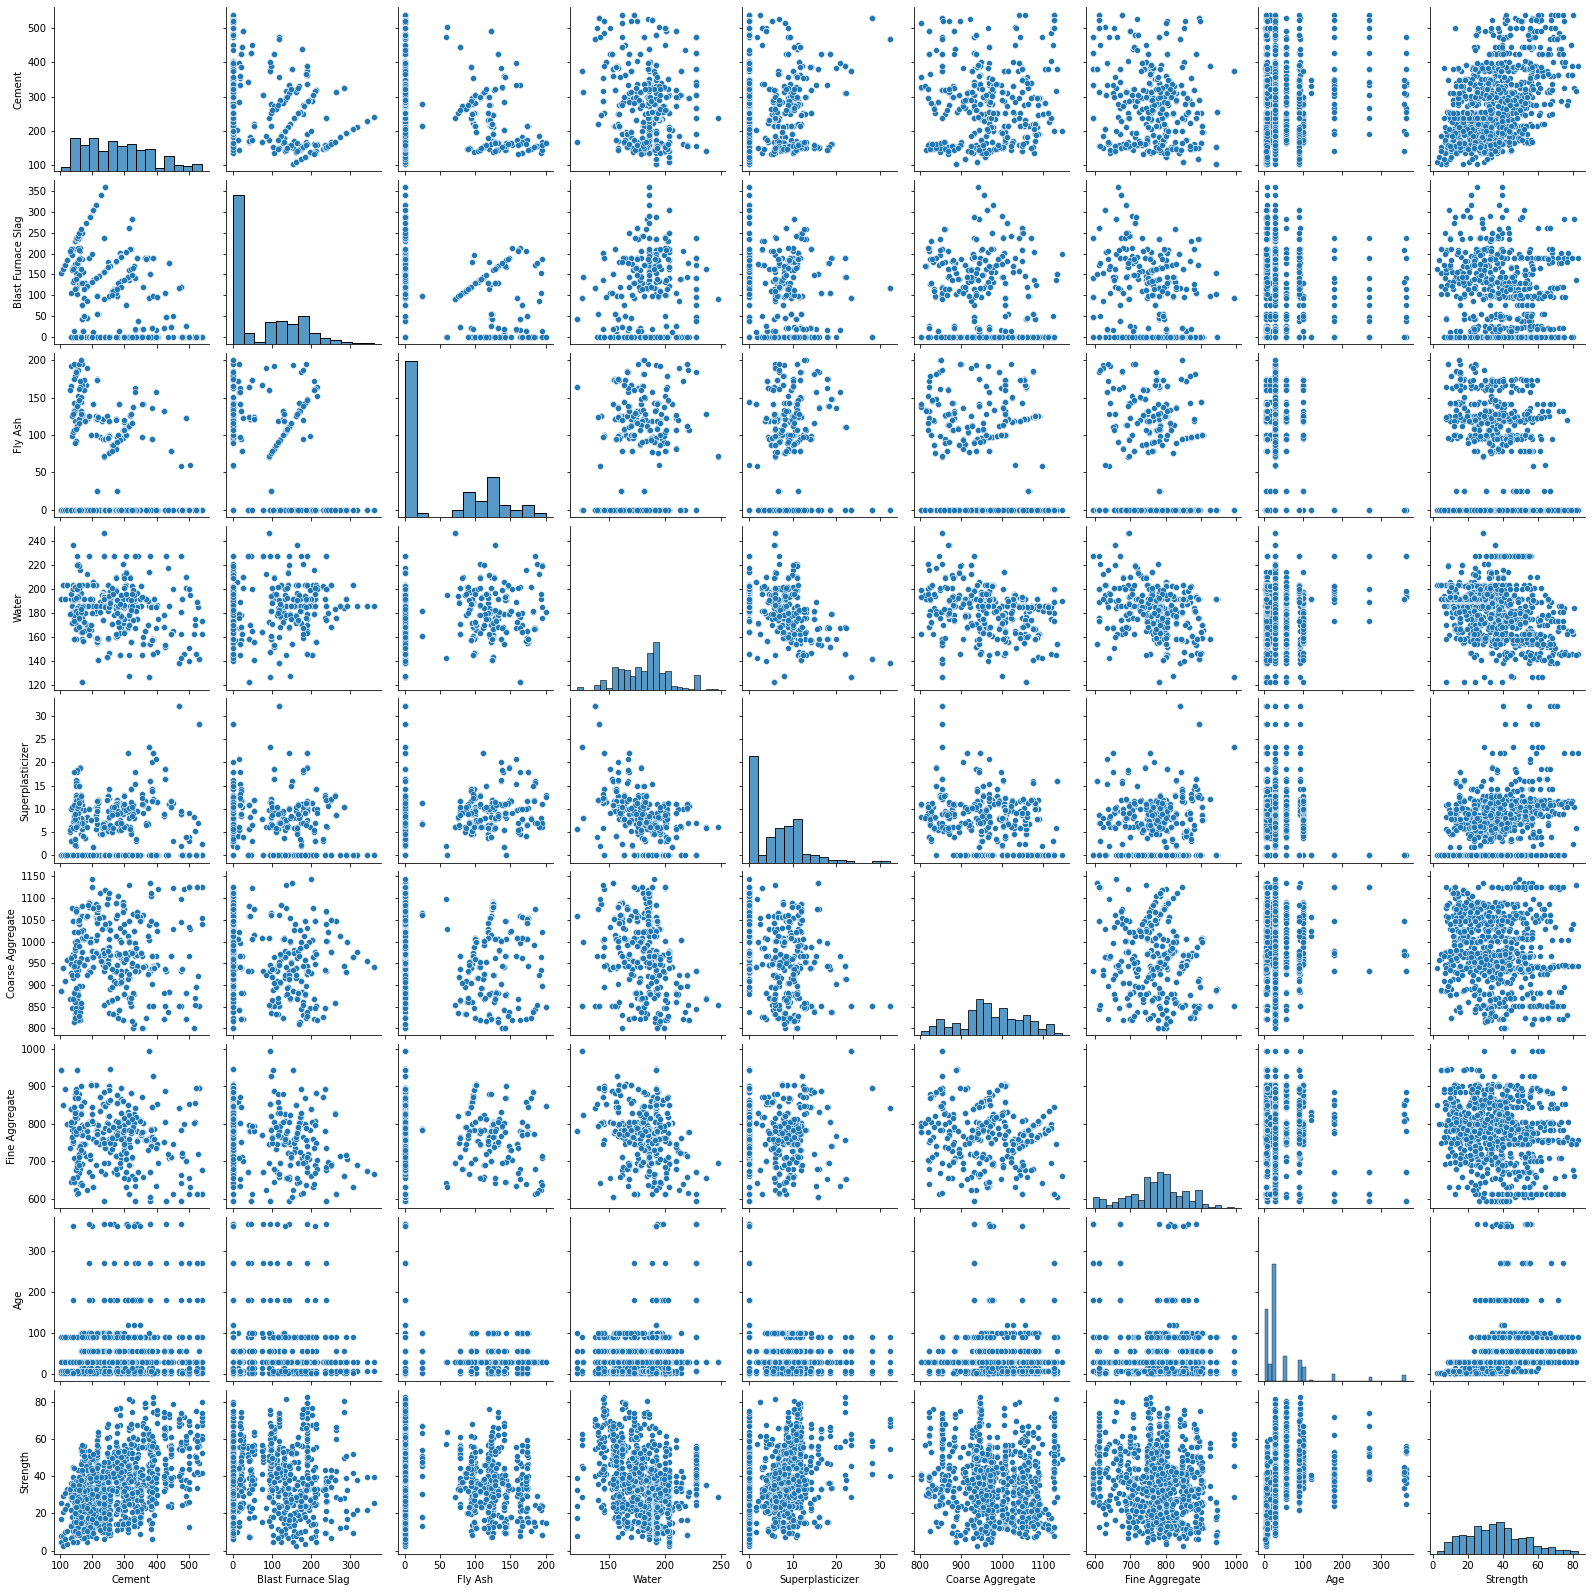

In [9]:
sns.pairplot(concrete_data)

### Scatter Plot - Strength Vs.(Cement, Age, Water)
Plotting scatter plots between Strength and other features to see more complex relations



<AxesSubplot:xlabel='Cement', ylabel='Strength'>

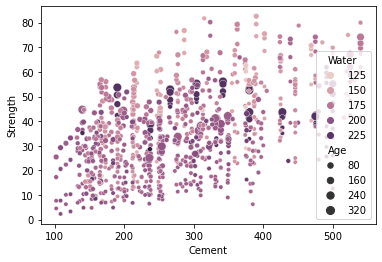

In [10]:
sns.scatterplot(y="Strength", x="Cement", hue="Water",size="Age", data=concrete_data)

The observations we can make from this plot:

1. Compressive strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis
2. Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent
3. Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis
4. The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate  high age and more water
5. Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter

### Scatter Plot - Strength Vs.(Fine aggregate, Super Plasticizer, Fly Ash)


<AxesSubplot:xlabel='Fine Aggregate', ylabel='Strength'>

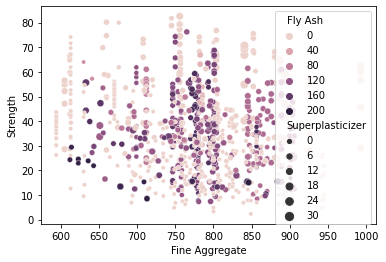

In [11]:
sns.scatterplot(y="Strength", x="Fine Aggregate", hue="Fly Ash",
   size="Superplasticizer", data=concrete_data)

The observations we can make from this plot:

1. Compressive strength decreases Fly ash increases, as darker dots are concentrated in the region representing low compressive strength.
2. Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.

### Data Preprocessing: Data Cleaning (Missing Data/ Noisy Data), Data Transformation (Normalization)


Checking the dataset for any missing values.

In [12]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean.

In [13]:
#remove rows that have negative values 
concrete_data = concrete_data[concrete_data['Cement']>0]
print("New dataframe length after removing rows containing negative values of Cement:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Blast Furnace Slag']>0]
print("New dataframe length after removing rows containing negative values of Blast Furnance Slag:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Fly Ash']>0]
print("New dataframe length after removing rows containing negative values of Fly Ash:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Water']>0]
print("New dataframe length after removing rows containing negative values of Water :", len(concrete_data))
concrete_data = concrete_data[concrete_data['Superplasticizer']>0]
print("New dataframe length after removing rows containing negative values of Superplasticizer :", len(concrete_data))
concrete_data = concrete_data[concrete_data['Coarse Aggregate']>0]
print("New dataframe length after removing rows containing negative values of Coarse Aggregate:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Fine Aggregate']>0]
print("New dataframe length after removing rows containing negative values of Fine Aggregate:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Age']>0]
print("New dataframe length after removing rows containing negative values of Age:", len(concrete_data))
concrete_data = concrete_data[concrete_data['Strength']>0]
print("New dataframe length after removing rows containing negative values of Strength:", len(concrete_data))

#rest the index of the new dataframe with NULL values excluded
concrete_data.reset_index(inplace = True)

#Number of rows remaining after removal of rows that had negative values
print("New dataframe length:", len(concrete_data))

New dataframe length after removing rows containing negative values of Cement: 1030
New dataframe length after removing rows containing negative values of Blast Furnance Slag: 559
New dataframe length after removing rows containing negative values of Fly Ash: 225
New dataframe length after removing rows containing negative values of Water : 225
New dataframe length after removing rows containing negative values of Superplasticizer : 225
New dataframe length after removing rows containing negative values of Coarse Aggregate: 225
New dataframe length after removing rows containing negative values of Fine Aggregate: 225
New dataframe length after removing rows containing negative values of Age: 225
New dataframe length after removing rows containing negative values of Strength: 225
New dataframe length: 225


Note: Data Normalization is handled in Part 2 of this project

### Data Modelling


In [14]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Sanity check of the features and the target dataframes.


In [15]:
predictors.head()

,index,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3
1,225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14
2,226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28
3,227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56
4,228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100


In [16]:
target.head()

0     7.75
1    17.82
2    24.24
3    32.85
4    39.23
Name: Strength, dtype: float64

Saving the number of features to *n_cols* since we will need this number when building the network


In [17]:
n_cols = predictors.shape[1] # number of predictors
n_cols

9

Import the Keras and Sklearn libraries and the required packages


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Using TensorFlow backend.


Defining a function that will be called to create the regression model with the following properties:
1. Hidden Layer: 1
2. Nodes: 10
3. Activation Function: ReLU
4. Optimizer: Adam
5. Loss Function: Mean Squared Error



In [19]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Train and Test the Network


In [20]:
# build the model
model = regression_model()

Randomly split the data into training and test sets by holding 30% of the data for testing. We use the train_test_split helper function.




In [21]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

Training the model on the training data using 50 epochs

In [22]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 63185.0977
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 43762.1016
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 31389.2712
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 25865.3252
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 15762.6659
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 14490.9355
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 12650.8524
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 10451.8148
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 10323.2508
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 10313.2458
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 9353.5223
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 8642.2585
Epoch 13/50
5/5 [==========

Evaluating the model on the test data and compute the Mean Squared Error (MSE) between the predicted concrete strength and the actual concrete strength.  Reporting the mean and the standard deviation of the MSEs.



In [23]:
y_pred = model.predict(X_test)
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

644.5952795142059 0.0


Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.



In [24]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
MSE_Mean_A = mean
MSE_StdDev_A = standard_deviation


print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 263.950439453125
MSE 2: 210.72691345214844
MSE 3: 176.90084838867188
MSE 4: 156.669189453125
MSE 5: 131.01284790039062
MSE 6: 96.53738403320312
MSE 7: 74.13977813720703
MSE 8: 88.82682037353516
MSE 9: 72.0885238647461
MSE 10: 65.04212188720703
MSE 11: 66.27212524414062
MSE 12: 65.86250305175781
MSE 13: 63.369441986083984
MSE 14: 56.17362976074219
MSE 15: 72.948974609375
MSE 16: 54.000274658203125
MSE 17: 65.79094696044922
MSE 18: 62.8997802734375
MSE 19: 68.45985412597656
MSE 20: 65.67792510986328
MSE 21: 85.10588836669922
MSE 22: 60.053646087646484
MSE 23: 71.55390930175781
MSE 24: 64.5457992553711
MSE 25: 60.49839782714844
MSE 26: 79.72193908691406
MSE 27: 60.67061996459961
MSE 28: 65.91492462158203
MSE 29: 65.5011215209961
MSE 30: 67.91194152832031
MSE 31: 69.26006317138672
MSE 32: 60.82984161376953
MSE 33: 66.16754150390625
MSE 34: 54.541290283203125
MSE 35: 53.38170623779297
MSE 36: 77.76219940185547
MSE 37: 56.3858642578125
MSE 38: 77.75978088378906
MSE 39: 65.818649291992

## 2. Normalize the data

Normalize the data by substracting the mean and dividing by the standard deviation. How does the mean of the mean squared errors compare to that from Step 1?


In [25]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()


,index,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.490790,-0.772427,-0.760117,1.212962,-2.561078,-0.900168,1.431177,0.424611,-1.181722
1,-1.486914,-0.772427,-0.760117,1.212962,-2.561078,-0.900168,1.431177,0.424611,-0.718650
2,-1.483038,-0.772427,-0.760117,1.212962,-2.561078,-0.900168,1.431177,0.424611,-0.129286
3,-1.479162,-0.772427,-0.760117,1.212962,-2.561078,-0.900168,1.431177,0.424611,1.049443
4,-1.475285,-0.772427,-0.760117,1.212962,-2.561078,-0.900168,1.431177,0.424611,2.901731


In [26]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
MSE_Mean_B = mean
MSE_StdDev_B = standard_deviation

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 1148.1068115234375
MSE 2: 729.5114135742188
MSE 3: 405.2649230957031
MSE 4: 317.2731628417969
MSE 5: 218.4724884033203
MSE 6: 155.94020080566406
MSE 7: 140.7127685546875
MSE 8: 133.89039611816406
MSE 9: 132.93357849121094
MSE 10: 89.43323516845703
MSE 11: 100.85971069335938
MSE 12: 109.68326568603516
MSE 13: 70.86643981933594
MSE 14: 62.343406677246094
MSE 15: 70.89500427246094
MSE 16: 52.18388366699219
MSE 17: 71.84861755371094
MSE 18: 60.22233963012695
MSE 19: 69.56224060058594
MSE 20: 64.05979919433594
MSE 21: 70.8970718383789
MSE 22: 54.08501434326172
MSE 23: 57.03934860229492
MSE 24: 56.22161865234375
MSE 25: 47.291465759277344
MSE 26: 64.08885955810547
MSE 27: 50.9537467956543
MSE 28: 54.45673751831055
MSE 29: 53.155296325683594
MSE 30: 56.689064025878906
MSE 31: 57.569644927978516
MSE 32: 56.498260498046875
MSE 33: 58.51589584350586
MSE 34: 45.401241302490234
MSE 35: 35.42362594604492
MSE 36: 57.37091064453125
MSE 37: 39.00465774536133
MSE 38: 50.47632598876953
MSE 39: 33

### Conclusion: By normalizing the predictors we marginally increase the mean and significantly increase the standard deviation values of the MSEs as compared to Step 1



## 3. Increase the number of epochs 



Repeat Part B but use 100 epochs this time for training. How does the mean of the mean squared errors compare to that from Step 2?

In [27]:
total_mean_squared_errors = 50
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
MSE_Mean_C = mean
MSE_StdDev_C = standard_deviation

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 34.7382926940918
MSE 2: 38.835296630859375
MSE 3: 31.401094436645508
MSE 4: 30.430248260498047
MSE 5: 37.14173126220703
MSE 6: 30.223962783813477
MSE 7: 25.317129135131836
MSE 8: 26.745641708374023
MSE 9: 37.14445495605469
MSE 10: 33.599239349365234
MSE 11: 21.826061248779297
MSE 12: 24.480880737304688
MSE 13: 28.294815063476562
MSE 14: 17.183534622192383
MSE 15: 22.97591209411621
MSE 16: 28.11203956604004
MSE 17: 26.432716369628906
MSE 18: 24.43416404724121
MSE 19: 28.708837509155273
MSE 20: 20.833084106445312
MSE 21: 25.715316772460938
MSE 22: 23.187114715576172
MSE 23: 18.044532775878906
MSE 24: 20.046295166015625
MSE 25: 20.768918991088867
MSE 26: 22.687210083007812
MSE 27: 24.657941818237305
MSE 28: 22.411754608154297
MSE 29: 18.517356872558594
MSE 30: 21.9772891998291
MSE 31: 20.097444534301758
MSE 32: 24.481199264526367
MSE 33: 19.97480583190918
MSE 34: 18.642765045166016
MSE 35: 18.859973907470703
MSE 36: 27.634254455566406
MSE 37: 18.39394187927246
MSE 38: 27.4420604705

### Conclusion: By increasing the epochs to 100, we significantly decrease the mean and standard deviation values of the MSEs as compared to Step 2

## 4. Increase the number of hidden layers

Repeat part 2 but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

In [28]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [29]:
# build the model
model = regression_model()

In [30]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
MSE_Mean_D = mean
MSE_StdDev_D = standard_deviation

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with increase in hidden layers to 3. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 252.26904296875
MSE 2: 133.18618774414062
MSE 3: 122.29137420654297
MSE 4: 97.40250396728516
MSE 5: 86.39566802978516
MSE 6: 65.53287506103516
MSE 7: 74.39417266845703
MSE 8: 74.4300308227539
MSE 9: 77.43922424316406
MSE 10: 67.58673095703125
MSE 11: 54.247047424316406
MSE 12: 70.17649841308594
MSE 13: 57.032772064208984
MSE 14: 49.14067840576172
MSE 15: 55.74987030029297
MSE 16: 43.685855865478516
MSE 17: 48.69649124145508
MSE 18: 31.778520584106445
MSE 19: 35.37854766845703
MSE 20: 30.573841094970703
MSE 21: 40.226844787597656
MSE 22: 26.287979125976562
MSE 23: 24.555580139160156
MSE 24: 25.290721893310547
MSE 25: 26.044605255126953
MSE 26: 28.373632431030273
MSE 27: 26.26601791381836
MSE 28: 23.103872299194336
MSE 29: 28.129329681396484
MSE 30: 22.75467300415039
MSE 31: 31.990938186645508
MSE 32: 27.486251831054688
MSE 33: 21.8887939453125
MSE 34: 26.52322006225586
MSE 35: 21.911209106445312
MSE 36: 32.75236129760742
MSE 37: 22.62914276123047
MSE 38: 25.588727951049805
MSE 39

### Conclusion: By increasing the number of hidden layers, we significantly decrease the mean and standard deviation values of the MSEs as compared to Step 2

# METRICS COMPARISON BETWEEN STEPS 1,2,3,4

In [31]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MSE: Mean','MSE: StdDev'],
         ['1', round((MSE_Mean_A),2), round((MSE_StdDev_A),2)],
         ['2', round((MSE_Mean_B),2), round((MSE_StdDev_B),2)],
         ['3', round((MSE_Mean_C),2), round((MSE_StdDev_C),2)],
         ['4', round((MSE_Mean_D),2), round((MSE_StdDev_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MSE: Mean,MSE: StdDev
1,79.4,40.18
2,111.59,187.19
3,23.89,5.73
4,44.88,40.14
